### Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights
Objective: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [13]:
df = pd.read_csv("/Users/mailysjaffret/IronHack/Descriptive stats/amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [15]:
df.shape

(2443651, 9)

### Part 1: Understanding Product Categories

**Business Question:** What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

**Frequency Tables:** Generate a frequency table for the product category. Which are the top 5 most listed product categories?

**Visualizations:** Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories. For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [20]:
category_frequency = df['category'].value_counts()
print(category_frequency)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64


In [22]:
top_5_categories = category_frequency.head(5)
print(top_5_categories)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


Text(0.5, 1.0, 'Top 5 categories Amazon UK')

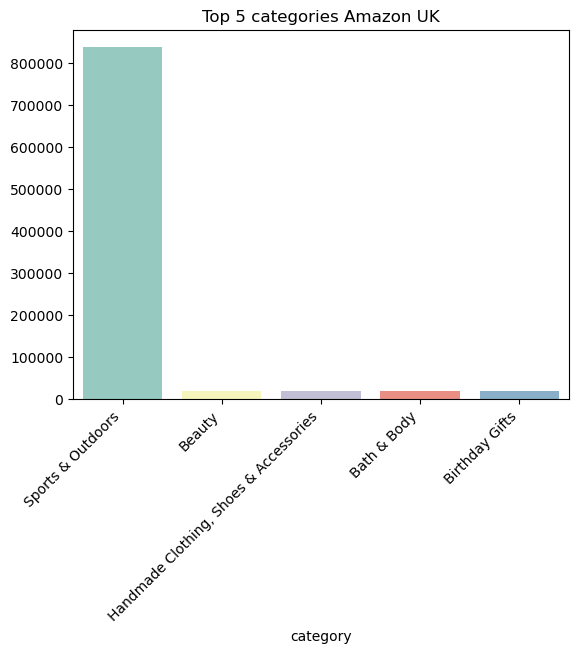

In [50]:
sns.barplot(x=top_5_categories.index, y=top_5_categories.values, palette="Set3")
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 categories Amazon UK')

(array([], dtype=float64), [])

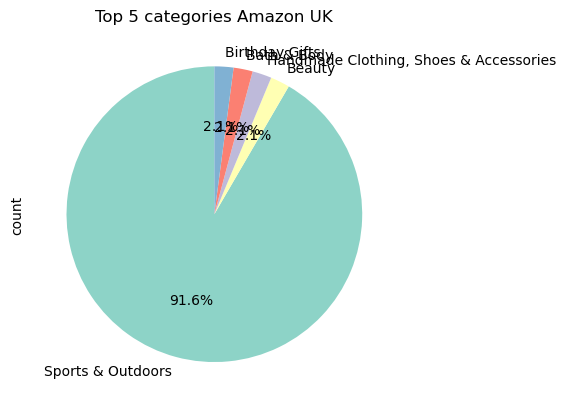

In [101]:
top_5_categories.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"), labeldistance=1.1)
plt.title('Top 5 categories Amazon UK')
plt.xticks(rotation=45, ha='right')

The bar chart shows the distribution of products listings across different categories, and the pie chart shows the proportions of listings among the provided categories. In both case, we can see the dominance of "Sports & Outdoors".

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

**Measures of Centrality:**
Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

**Measures of Dispersion:**
Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?

**Visualizations:** 
Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [71]:
print(df['price'].mean())
print(df['price'].median())
print(df['price'].mode()[0])

89.24380943923663
19.09
9.99


The mean is significantly higher than the median, it suggests that there are some high-priced products pulling the mean up, indicating a right-skewed distribution.
The mode is much lower than the mean and median, it suggests that the most common price point is lower than the average price, possibly due to many low-cost items.

In [78]:
print(df['price'].var())
print(df['price'].std())
print(df['price'].max() - df['price'].min())

print(df['price'].quantile(0.25))
print(df['price'].quantile(0.75))

119445.48532256528
345.60886175352226
100000.0
9.99
45.99


A variance of 119445.49 indicates a significant spread in prices, meaning that there is a considerable variation in the prices of products.
A standard deviation of 345.61 suggests that prices vary widely around the mean price. This further reinforces that there is a large range of prices, with many products differing significantly from the average.
A range of 100000 indicates a very wide spectrum of product prices, from the cheapest to the most expensive. This large range suggests that there are both very low-priced and very high-priced items in the dataset.

<Axes: xlabel='price', ylabel='Count'>

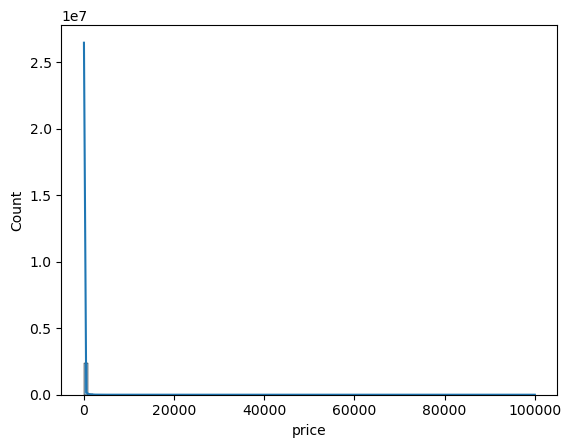

In [87]:
sns.histplot(df['price'], bins=100, kde=True)

<Axes: xlabel='price'>

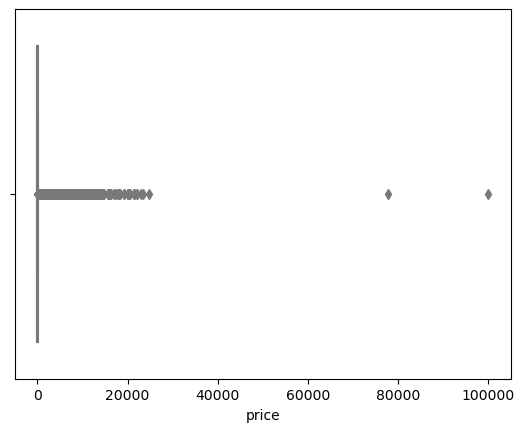

In [90]:
sns.boxplot(data = df, x = 'price', color="lightblue")

Histogram shows the concentration of lower-priced items with a skewed distribution due to a few very high-priced products.
Box help visualize the spread and highlight any outliers, confirming if there are indeed products that are priced significantly higher than the rest.

### Part 3: Unpacking Product Ratings

**Business Question:** How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

**Measures of Centrality:** Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?

**Measures of Dispersion:** Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?

**Shape of the Distribution:** Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

**Visualizations:** Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [107]:
print(df['stars'].mean())
print(df['stars'].median())
print(df['stars'].mode()[0])

2.152836472966065
0.0
0.0


The mean rating of the products is 2.15. This a relatively low mean (2.15/5).
The median rating is 0.0 (weird)
The mode (most frequently occuring rating), is als 0.0. The most common rating given by customers is 0.

In [125]:
print(df['stars'].var())
print(df['stars'].std())
print(df['stars'].quantile(0.25))
print(df['stars'].quantile(0.75))
iqr_rating = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)
print(iqr_rating)

4.81743402976196
2.1948653785054697
0.0
4.4
4.4


The variance is 4.8174, that suggest a significant amount of variability in the ratings

In [133]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

skewness_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

A skewness of 0.0812 is very close to 0, indicating that the distribution is nearly symmetrical over the mean.

<Axes: xlabel='stars', ylabel='Count'>

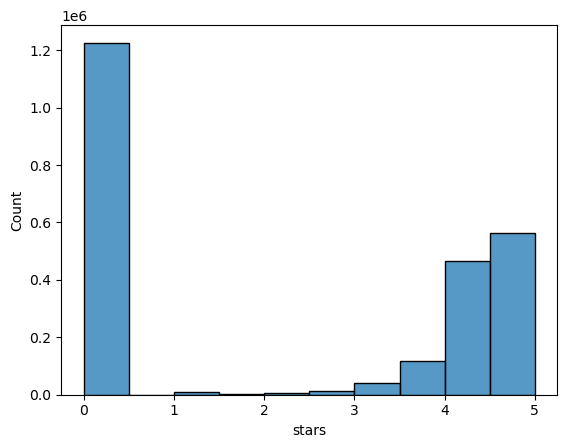

In [137]:
sns.histplot(df['stars'], bins=10, kde=False)

The histogram shows a large peak at 0, it means that a rating of 0 is the most common, which aligns with the earlier finding that the mode of the rating was 0.